In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
df=pd.read_csv(r"C:\myfiles\sem4\housing.csv")

In [5]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [11]:
df_shuffled =df.sample(n=len(df), random_state=42)
df_shuffled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN


In [17]:
pd.get_dummies(df_shuffled['ocean_proximity']).head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
20046,False,True,False,False,False
3024,False,True,False,False,False
15663,False,False,False,True,False
20484,True,False,False,False,False
9814,False,False,False,False,True


In [18]:
df_shuffled.drop('ocean_proximity', axis=1).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0


In [44]:
df_final = pd.concat([df_shuffled.drop('ocean_proximity', axis=1),
                            pd.get_dummies(df_shuffled['ocean_proximity'])], axis=1)
df_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,False,True,False,False,False
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,False,True,False,False,False
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,False,False,False,True,False
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,True,False,False,False,False
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,True,False,False,False,False
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,False,True,False,False,False
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,True,False,False,False,False
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,True,False,False,False,False


In [45]:
df_final['<1H OCEAN']=df_final['<1H OCEAN'].map({True: 1, False: 0})    

In [46]:
df_final['INLAND']=df_final['INLAND'].map({True: 1, False: 0})
df_final['ISLAND']=df_final['ISLAND'].map({True: 1, False: 0})
df_final['NEAR BAY']=df_final['NEAR BAY'].map({True: 1, False: 0})
df_final['NEAR OCEAN']=df_final['NEAR OCEAN'].map({True: 1, False: 0})

In [47]:
df_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,0,1,0,0,0
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,0,1,0,0,0
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,0,0,0,1,0
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,1,0,0,0,0
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,1,0,0,0,0
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,0,1,0,0,0
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,1,0,0,0,0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,1,0,0,0,0


In [51]:
df_reset = df_final.reset_index()

df_reset.drop('index', axis=1, inplace=True)
df_reset




,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,0,1,0,0,0
1,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,0,1,0,0,0
2,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,0,0,0,1,0
3,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,1,0,0,0,0
4,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,1,0,0,0,0
20636,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,0,1,0,0,0
20637,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,1,0,0,0,0
20638,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,1,0,0,0,0


In [52]:
df_reset['total_bedrooms']=df_reset['total_bedrooms'].fillna(0)

In [53]:
df_reset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-119.01,36.06,25.0,1505.0,0.0,1392.0,359.0,1.6812,47700.0,0,1,0,0,0
1,-119.46,35.14,30.0,2943.0,0.0,1565.0,584.0,2.5313,45800.0,0,1,0,0,0
2,-122.44,37.80,52.0,3830.0,0.0,1310.0,963.0,3.4801,500001.0,0,0,0,1,0
3,-118.72,34.28,17.0,3051.0,0.0,1705.0,495.0,5.7376,218600.0,1,0,0,0,0
4,-121.93,36.62,34.0,2351.0,0.0,1063.0,428.0,3.7250,278000.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,1,0,0,0,0
20636,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,0,1,0,0,0
20637,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,1,0,0,0,0
20638,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,1,0,0,0,0


In [62]:
df_reset

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,25.0,1505.0,0.0,1392.0,359.0,1.6812,47700.0,0,1,0,0,0
1,30.0,2943.0,0.0,1565.0,584.0,2.5313,45800.0,0,1,0,0,0
2,52.0,3830.0,0.0,1310.0,963.0,3.4801,500001.0,0,0,0,1,0
3,17.0,3051.0,0.0,1705.0,495.0,5.7376,218600.0,1,0,0,0,0
4,34.0,2351.0,0.0,1063.0,428.0,3.7250,278000.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,1,0,0,0,0
20636,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,0,1,0,0,0
20637,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,1,0,0,0,0
20638,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,1,0,0,0,0


In [67]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
X = df_reset.drop(['median_house_value'], axis=1)
y = df_reset['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
        #scaler = StandardScaler()
        #X_train_scaled = scaler.fit_transform(X_train)
        #X_test_scaled = scaler.transform(X_test)





((16512, 11), (4128, 11), (16512,), (4128,))

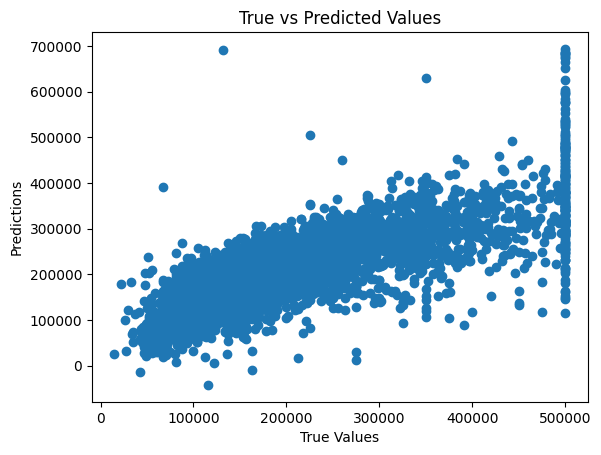

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [68]:
  
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_pred = model.predict(X_test)

mean_squared_error(y_test, y_pred)
r2_score(y_test, y_pred)
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()
plt.figure(figsize=(10, 6))


